<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Correlation_Calculation_Crude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [10]:
data = pd.read_csv('/content/MCX_CRUDEOIL1!, 1D.csv')

In [11]:
import datetime
data['date']=data.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%d-%m-%Y'))

In [12]:
data.tail(2)

,time,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA,date
977,1627615800,5445,5524,5430,5517,15800.6,15862.8,15744.85,15763.05,38061,61836.10,30-07-2021
978,1627875000,5494,5494,5254,5298,15874.9,15892.9,15834.65,15885.15,75654,63564.35,02-08-2021


In [13]:
del data['time']

In [14]:
data= data.set_index('date')

In [15]:
data.tail(5)

,open,high,low,close,"NIFTY, NSE: Open","NIFTY, NSE: High","NIFTY, NSE: Low","NIFTY, NSE: Close",Volume,Volume MA
date,,,,,,,,,,
27-07-2021,5374,5392,5308,5334,15860.50,15881.55,15701.00,15746.45,44782,65543.10
28-07-2021,5359,5415,5344,5403,15761.55,15767.50,15513.45,15709.40,41088,64450.80
29-07-2021,5410,5464,5394,5447,15762.70,15817.35,15737.80,15778.45,34260,62396.40
30-07-2021,5445,5524,5430,5517,15800.60,15862.80,15744.85,15763.05,38061,61836.10
02-08-2021,5494,5494,5254,5298,15874.90,15892.90,15834.65,15885.15,75654,63564.35


In [16]:
data_subset = data[['close','NIFTY, NSE: Close']]

In [17]:
data_subset.tail(2)

,close,"NIFTY, NSE: Close"
date,,
30-07-2021,5517,15763.05
02-08-2021,5298,15885.15


In [18]:
data_subset.columns=['close_eem','close_nifty']

In [19]:
data_subset['close_percent_eem']=data_subset['close_eem'].pct_change(60)
data_subset['close_percent_nifty']=data_subset['close_nifty'].pct_change(60)

In [20]:
data_subset.dropna(inplace=True)

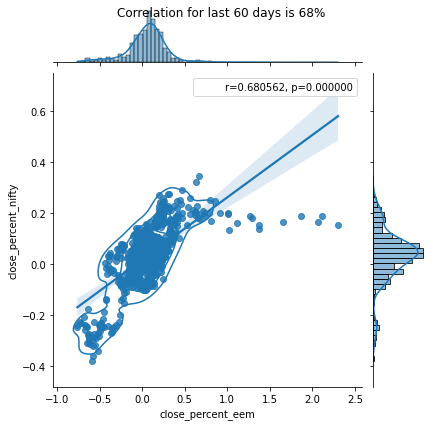

In [21]:
g=sns.jointplot(x='close_percent_eem',y='close_percent_nifty',data=data_subset,kind='reg').plot_joint(sns.kdeplot,n_levels=6)
r, p = pearsonr(data_subset['close_percent_eem'], data_subset['close_percent_nifty'])
phantom, = g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.suptitle(f'Correlation for last 60 days is {round(r*100)}%')
plt.show()